# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# Your code here.
student_data = pd.DataFrame({'StudentID': np.arange(1,11),'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


In [2]:
# Your code here.


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
# The hypothesis that younger people tend to be late more often seems to be valid.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
corr = student_data['Age'].corr(student_data['Tardies'])
print('The correlation is: ', corr)

#covariance:
cov = student_data['Age'].cov(student_data['Tardies'])
print('The covariance is: ', cov)

#The -0.939 value for correlation indicates there is a very strong correlation between age and being late 
# --> the older the age, the less amount of times the student is late.

# The negative value of -45.6 for covariance tells us that as one parameter increases (age), the other one (being late)
# decreases. (They move in opposite directions.)

The correlation is:  -0.9391626886887122
The covariance is:  -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
x = student_data[['Age']]
y = student_data['Tardies']
model = linear_model.LinearRegression()

result = model.fit(x,y)

display(result.intercept_)  # y-intercept
display(result.coef_)       # coefficient / slope

#using a linear regression

12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

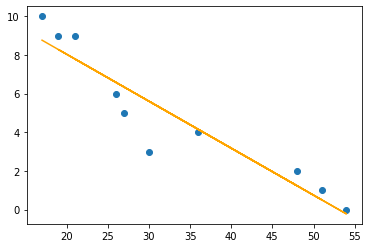

In [6]:
# Your code here.
regression_line = result.intercept_ + result.coef_ * x

plt.scatter(x,y)
plt.plot(x, regression_line, c= 'orange')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Your response here. 
# this small sample of data seems to draw the conclusion that age is indeed a good predictor of tardiness. 
#older age--> less tardiness. The data fits very well so I am quite confident, but it is a small sample..

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/isabellevanhoorn/Documents/Ironhack/labs/week 4/lab-regression-analysis/your-code/vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Your response here. 
corr_year = vehicles['Year'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr_year: ', corr_year, 'not much correlation')

corr_cylinders = vehicles['Cylinders'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr_cylinders: ', corr_cylinders, 'quite high correlation')

corr_fuel_barrels = vehicles['Fuel Barrels/Year'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr_fuel_barrels: ', corr_fuel_barrels, 'very high correlation')

corr_mpg = vehicles['Combined MPG'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr_mpg: ', corr_mpg, 'very high correlation')

corr_fuel_cost = vehicles['Fuel Cost/Year'].corr(vehicles['CO2 Emission Grams/Mile'])
print('corr_fuel_cost: ', corr_fuel_cost, 'very high correlation')


# The fuel barrels, MPG, and Fuel cost are all highly correlated to the CO2 emissions. 
# The amount of cylinders are also correlated. The year however doesn't seem to have much correlation.

corr_year:  -0.22229960295054238 not much correlation
corr_cylinders:  0.7523925537297486 quite high correlation
corr_fuel_barrels:  0.9861886621428727 very high correlation
corr_mpg:  -0.9262290389336443 very high correlation
corr_fuel_cost:  0.9308651512201844 very high correlation


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here. 

X = vehicles[['Fuel Barrels/Year','Combined MPG','Fuel Cost/Year' ]]
y = vehicles['CO2 Emission Grams/Mile']

model = linear_model.LinearRegression()
result = model.fit(X,y)

result.score(X,y)

0.9801993833262163

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [19]:
# Your response here. 
display(result.intercept_)
display(result.coef_)

# not sure what is meant by the regression summary? But these are the y-intercept and the coefficients/weights for 
# the different attributes/feautres. In repective order: 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year' 

131.674171842276

array([19.69545749, -3.166074  ,  0.03166095])

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [53]:
# Your code here.
error_analysis = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
error_analysis

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

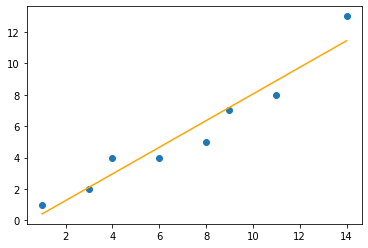

In [54]:
# Your code here.
model = linear_model.LinearRegression()

x = error_analysis[['X']]
y = error_analysis['Y']

result = model.fit(x,y)

regression_line = result.coef_[0]*x + result.intercept_

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [56]:
# Your response here. 
# There definitely seems to be a linear correlation between the two variables. As X increases, so does Y. 
# with approximately 0.85


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

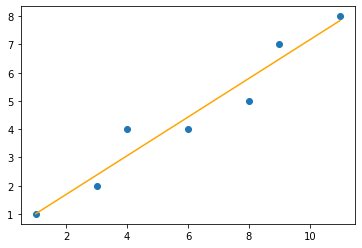

In [61]:
# Your response here. 
# the biggest oulier seems to be the last point.

dropped = error_analysis.drop(axis =0, index = 7)


x = dropped[['X']]
y = dropped['Y']

result = model.fit(x,y)

regression_line = result.coef_[0]*x + result.intercept_

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [63]:
# Your response here. 
#The coefficient (slope) has decreased by a little bit. 0.68 vs 0.85